In [7]:
# imports
# Science imports
import pandas as pd
import numpy as np

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Config matplotlib
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True # in matplotlib, edge borders are turned off by default.
sns.set_style("darkgrid") # set a grey grid as a background

import random

In [42]:
ls *.csv

project_scoring.csv


In [8]:
# get data
df = pd.read_csv("project_scoring.csv")

In [9]:
df

,Initiatives,project1,project2,project3,project4,project5,project6
0,"Initiative Priority - 1-5, higher is more impo...",5.0,5.0,4.0,3.0,3.0,1.0
1,Timeline Score - quarter to be delivered in 1-...,5.0,2.0,3.0,1.0,5.0,1.0
2,Hassle Score (1-5) - estimate complexity for i...,5.0,3.0,5.0,NaN,5.0,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,individual scores for how relevant or complex ...,NaN,NaN,NaN,NaN,NaN,NaN
5,client1,3.0,4.0,2.0,1.0,5.0,5.0
6,client2,0.0,2.0,3.0,2.0,4.0,2.0
7,client3,0.0,3.0,0.0,0.0,3.0,3.0
8,client4,5.0,1.0,2.0,0.0,4.0,2.0
9,client5,4.0,0.0,4.0,0.0,3.0,5.0


In [10]:
# split out metascoring, remove metascoring and reset df
inipri = df.iloc[0].fillna(0)
timepri = df.iloc[1].fillna(0)
hasspri = df.iloc[2].fillna(0)
initimepri = inipri[1:] + timepri[1:]
df.drop([0,1,2,3,4],axis=0,inplace=True) # remove the metascoring and notes
# df.drop([0,1],axis=0,inplace=True)
df = df.reset_index(drop=True)

In [11]:
initiatives = pd.Series(df.columns)
tenants = df['Initiatives']

In [12]:
# build category color maps
# colors list needs to be as long as df.columns
len(df.columns)
# mycolors = ['red','orange','yellow','green','blue','indigo','violet','white','black','darkblue',
#            'lightgreen','lightblue','darkgreen','pink','darkred','lightyellow']
# TODO - change this to a colormap
mycolors = ['red','orange','yellow','green','blue','indigo','violet']


In [13]:
df.columns

Index(['Initiatives', 'project1', 'project2', 'project3', 'project4',
       'project5', 'project6'],
      dtype='object')

In [48]:
mycolors

['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

In [14]:
for x in range(0,len(df.columns)):
    print(df.columns[x], mycolors[x])

Initiatives red
project1 orange
project2 yellow
project3 green
project4 blue
project5 indigo
project6 violet


In [15]:
# create these as a dict
colors = dict(zip(df.columns,mycolors))

In [16]:
colors

{'Initiatives': 'red',
 'project1': 'orange',
 'project2': 'yellow',
 'project3': 'green',
 'project4': 'blue',
 'project5': 'indigo',
 'project6': 'violet'}

In [17]:
colors.keys()

dict_keys(['Initiatives', 'project1', 'project2', 'project3', 'project4', 'project5', 'project6'])

In [18]:
# add squaring function for bubble sizing
def square(n):
    return n ** 2


In [39]:
# df.drop([0,1],axis=0,inplace=True)

In [19]:
datadict = {}
for x in range(0, len(df.index)):
    for y in list(df.columns.values[1:]):
        # print(x, y)
        # initiative is colors.values()
        itemscore = df.at[x,y]
        tenant = tenants[x]
        time = timepri[y]
        hassle = hasspri[y]
        myscore = df.at[x,y] + time + hassle
        hassscore = myscore + hassle
        diffscore = round(myscore / hassscore, 2)
        newsize = square(itemscore)
        name=f'{y}-{tenant}'.replace(" ","")
        # test values
        # print(y, tenant, time, df.at[x,y], myscore,diffscore)
        # print(f'Project: {y}, Tenant: {tenant}, Commitment Quarter: {time}, ItemScore {itemscore}, FullScore: {myscore}, Diff: {diffscore}')
        datadict[name] = {}
        datadict[name]['newsize'] = newsize
        datadict[name]['diffscore'] = diffscore
        datadict[name]['time'] = time
        datadict[name]['initiative'] = y
        datadict[name]['tenant'] = tenant
        datadict[name]['score'] = myscore
        datadict[name]['itemscore'] = itemscore
        datadict[name]['color'] = colors[y]
        datadict[name]['pointsestimate'] = itemscore + hassle

In [20]:
# how relevant are all the projects to each of the tenants in this system?
irrelevant = 0
relevant = 0
total = 0
for k, v in datadict.items():
    total +=1
    if v['itemscore'] < 1:
        irrelevant += 1
    else:
        relevant += 1

mydiff = relevant / total
print(f'{relevant} Relevant and {irrelevant} Irrelevant of {total} total project matches. \nRelevance Percentage: {mydiff} ')


45 Relevant and 9 Irrelevant of 54 total project matches. 
Relevance Percentage: 0.8333333333333334 


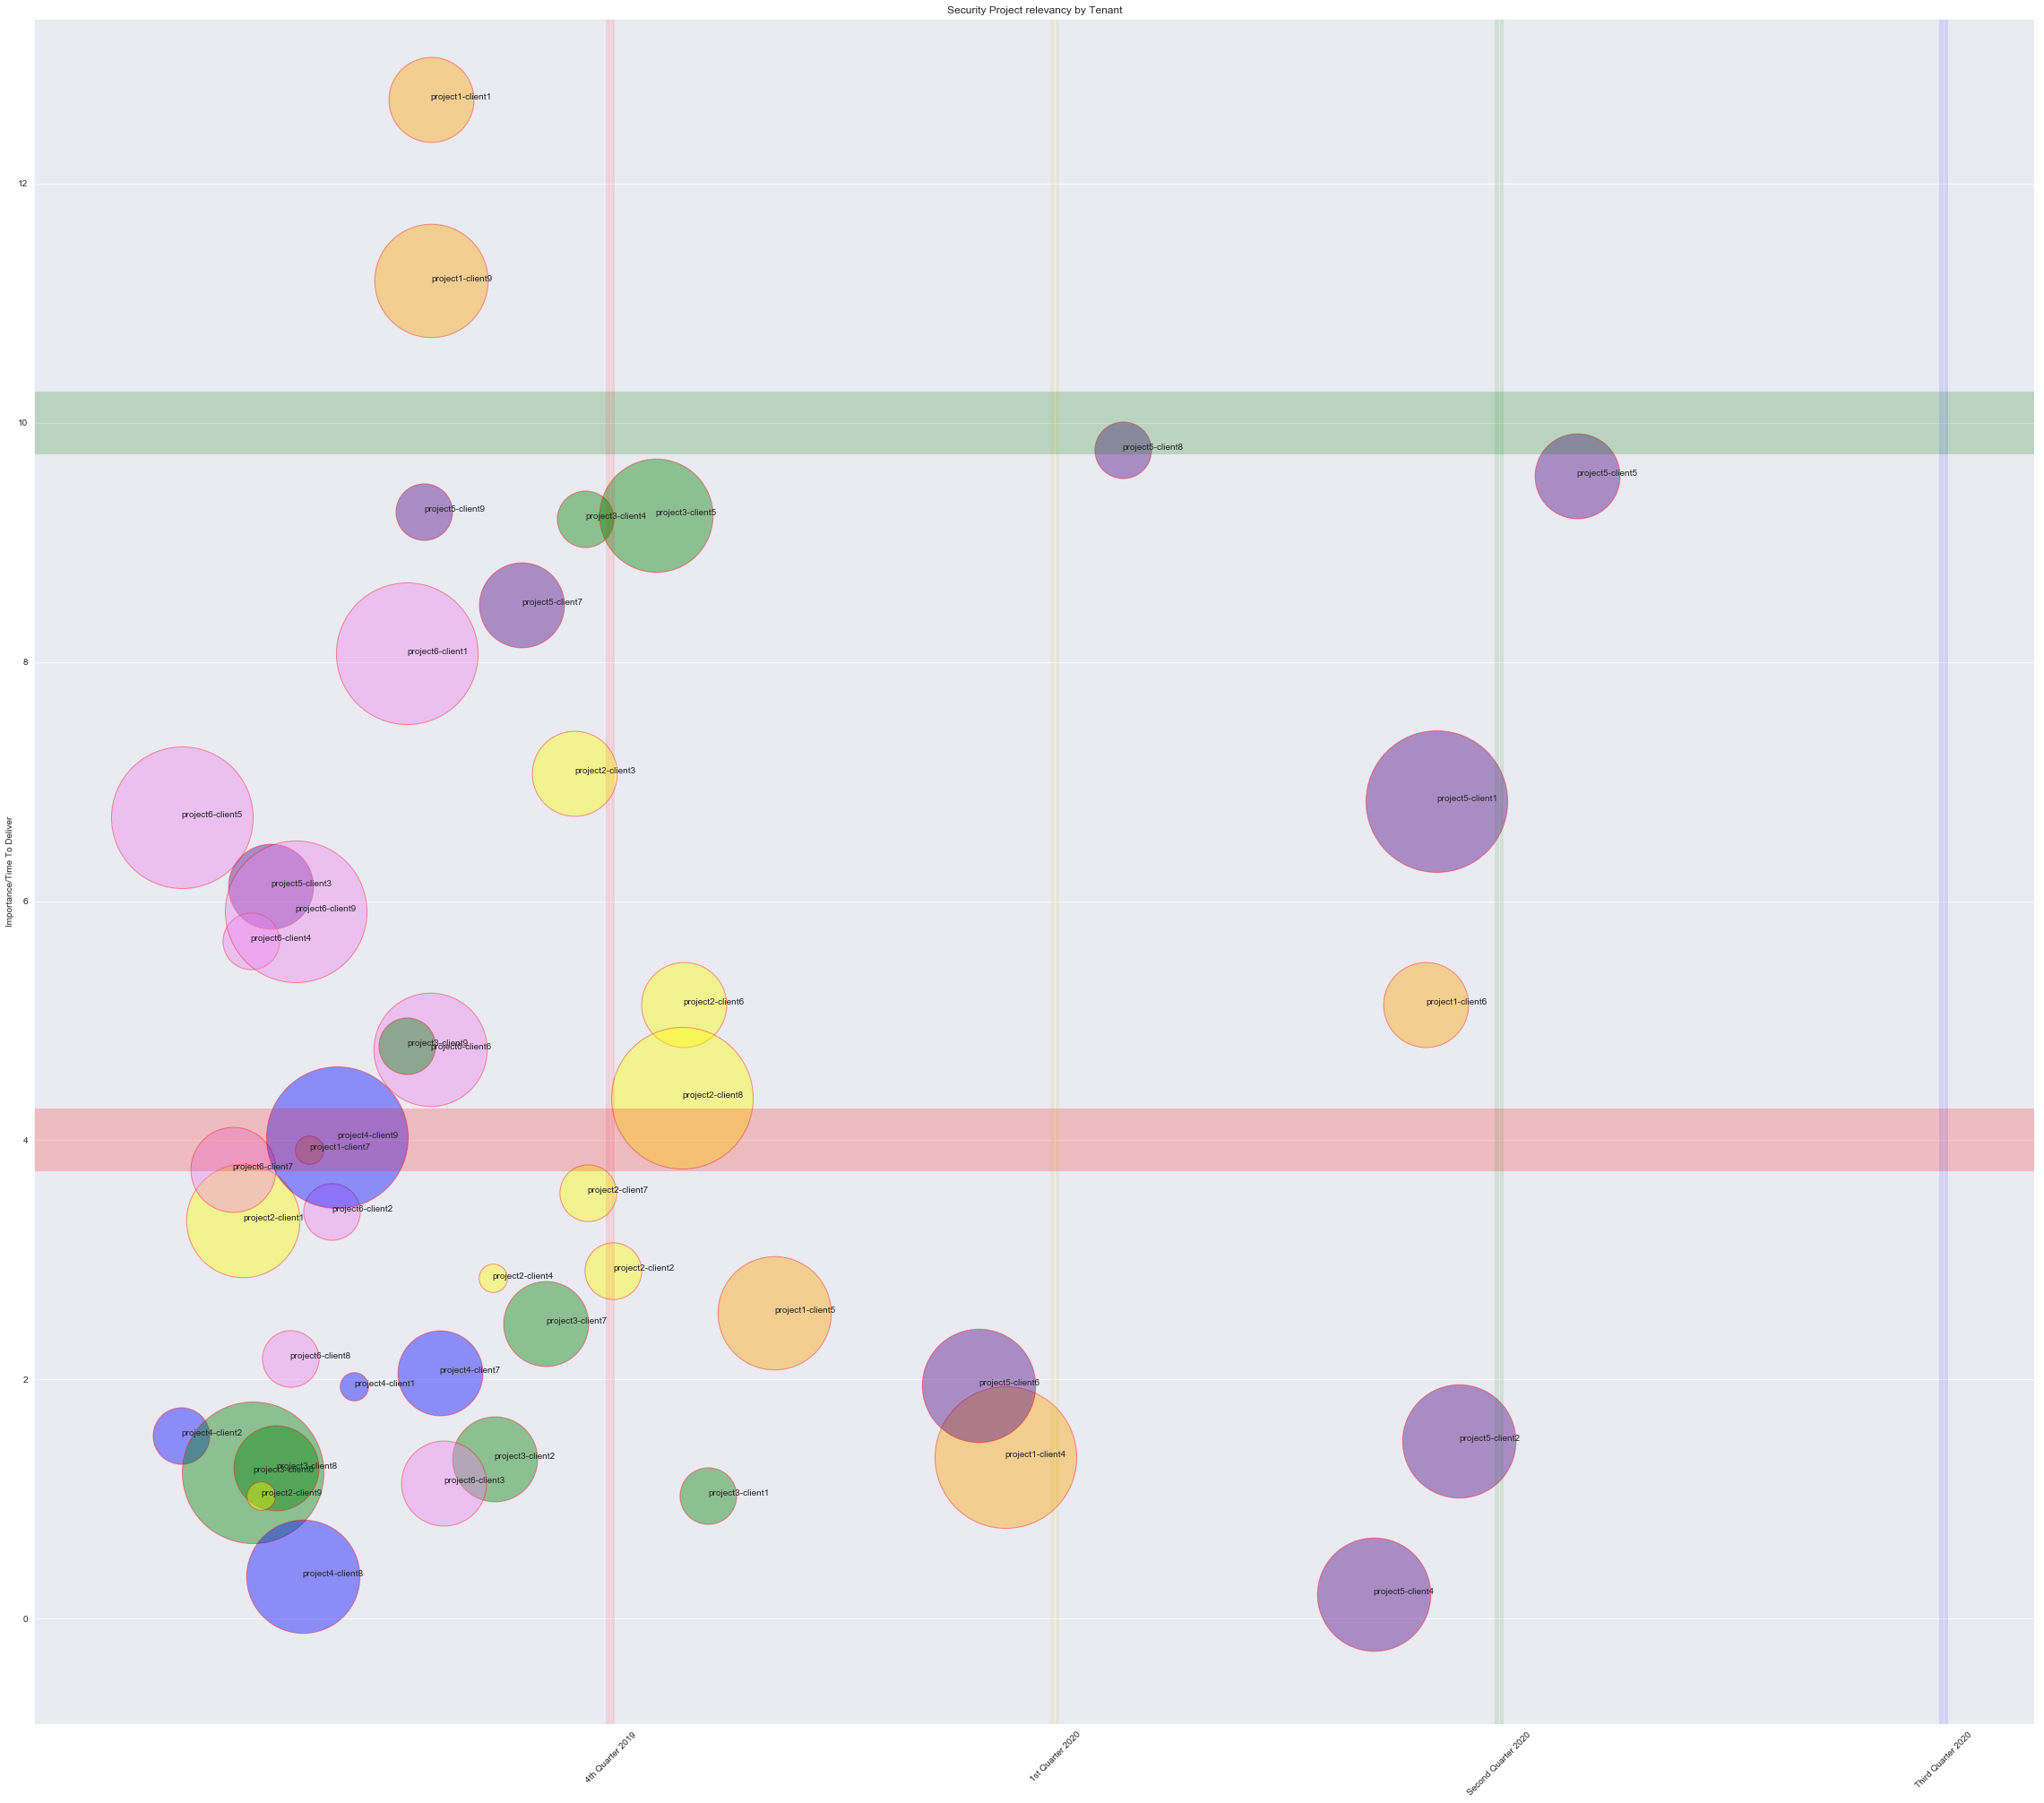

In [21]:
# viz the tuple/dicts
fig = plt.figure(figsize=(40,35))

ax = fig.add_subplot(1,1,1)

for k, v in datadict.items():
    if v['itemscore'] > 0: #only add if scoring item relevant
        x = (v['time'] * random.uniform(.01,.99) * 10) # try to make quarters relevant
        y=v['score'] * random.uniform(.01,.99) # 
        s=v['newsize']* 1000 # clearer as s-scale than hassle differential
        color=v['color']
        ax.scatter(x,y,s, c=color, alpha=0.4, edgecolors='red', linewidth=1, label=k) 
        ax.annotate(k, (x, y))

# set worth-it lines
plt.axhline(y=10, color='g', linestyle='-', alpha=0.2, lw=70)
plt.axhline(y=4, color='r', linestyle='-', alpha=0.2, lw=70)

# Draw quarterly vertical lines
vertcolors=['r','y','g','b']
quarters=[15,30,45,60]
for quart in range(0, len(quarters)):
    plt.axvline(x=quarters[quart], color=vertcolors[quart], linestyle='-', alpha=0.1, lw=10)
    
# set x tick labels    
#xquarters=['Q4-19','Q1-20','Q2-20','Q3-20']
xquarters=['4th Quarter 2019','1st Quarter 2020','Second Quarter 2020','Third Quarter 2020']
ax.set_xticks(quarters)
ax.set_xticklabels(xquarters, rotation=45)


# add titles (main and on axis)
plt.xlabel("") # X indicats quarters
plt.ylabel('Importance/Time To Deliver')
plt.title('Security Project relevancy by Tenant')

# save a copy
plt.savefig('project_scoring_savefile.png')

# display in notebook
plt.show()